<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Подбор-параметров" data-toc-modified-id="Подбор-параметров-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подбор параметров</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

Для решения данног кейса мы слелаем следующее:

1) Изучим и подготовим данные

2) Проанализируем временной ряд

3) Обучим модели:

    - LinearRegression
    - LGBM модель
    - CatBoost модель
    - модель RandomForest
    - модель DecisionTree
    
4) Протестируем указанные модели, завмерив их время обучения, предсказания и RMSE

5) Выберем модели, удовлетворящие условию задачи.

## Подготовка

В данном разделе мы:

1) прочитаем датасет

2) проверим столбцы, форматы данных, наличие пропусков

3) ресемплируем данные

In [1]:
# загрузим необходимые бибилиотеки
import time

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# загрузим данные
data = pd.read_csv('....csv')

In [3]:
# выведем первые 5 строк
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
# выведем общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [5]:
# выведем размер данных
data.shape

(26496, 2)

In [6]:
# проверим названия колонок
data.columns

Index(['datetime', 'num_orders'], dtype='object')

In [7]:
# проверим наличие пропусков
data.isna().sum()

datetime      0
num_orders    0
dtype: int64

In [8]:
# прочерим столбец num_oreders
data['num_orders'].describe()

count    26496.000000
mean        14.070463
std          9.211330
min          0.000000
25%          8.000000
50%         13.000000
75%         19.000000
max        119.000000
Name: num_orders, dtype: float64

Как и ожидалось, столбец дата не в нужном формате datetime. Поэтому заново откроем наш датасет, но сраху же изменим тип данных, параметром parse_date, а также установим индекс таблицы равный столбцу datetime

In [9]:
df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col='datetime')

In [10]:
# выведем на экран первые пять строк df
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [11]:
df.shape

(26496, 1)

In [12]:
# проверим, в хронологическом ли порядке даты
df.sort_index(inplace=True)
print(df.index.is_monotonic)

True


Получили значение True, это говорит о том, что даты расположены в хронологическом порядке. Проверим минимальную и максимальную даты

In [13]:
print(f'Минимальная дата: {df.index.min()}')
print(f'Максимальная дата: {df.index.max()}')

Минимальная дата: 2018-03-01 00:00:00
Максимальная дата: 2018-08-31 23:50:00


In [14]:
# выведем общую информацию по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<AxesSubplot:xlabel='datetime'>

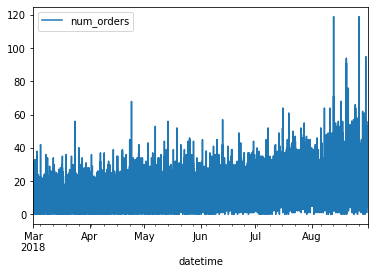

In [15]:
# построим график времени
df.plot()

В данных все хорошо, произведем ресемплирование данных по одному часу

In [16]:
# ресемплировнаие данных по одному часу
df = df.resample('1H').sum()

<AxesSubplot:xlabel='datetime'>

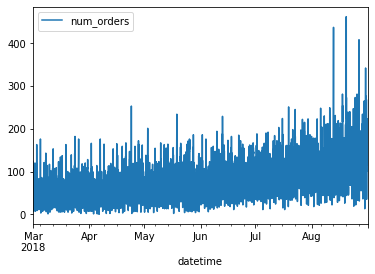

In [17]:
df.plot()

### Вывод

В ходе выполнения данного раздела было:

1) открыт и изучен датасет. Было обнаружено, что формат столбца datetime был указан неверно. Все остальное впорядке: пропусков нет, названия столбцов указаны верно

2) далее мы заново открыли датасет, указав специфические параметры для того, чтобы в столбце datetime был необходимы формат, сделали данный столбец в качестве индексов, проверили, в хронологическом ли порядке идут наши даты. Нашли минимальную и максимальную даты: 2018-03-01 и 2018-08-31 соответственно

3) провели ресемплирование данных по оному часу.

Данные готовы для дальнейшего анализа.

## Анализ

В данном разделе проведем анализ данных.Посмотрим на тренд и сезонность данных с помощью функци seasonal_decompose(), которая раскладывает временной ряд на три составляющие: тренд, сезонность, остаток декомпозиции, а также используем скользящее среднее, для того, чтобы снизить колебания

In [19]:
# построим графики тренда, сезонности и остатка декомпозиции
decomposed = seasonal_decompose(df)

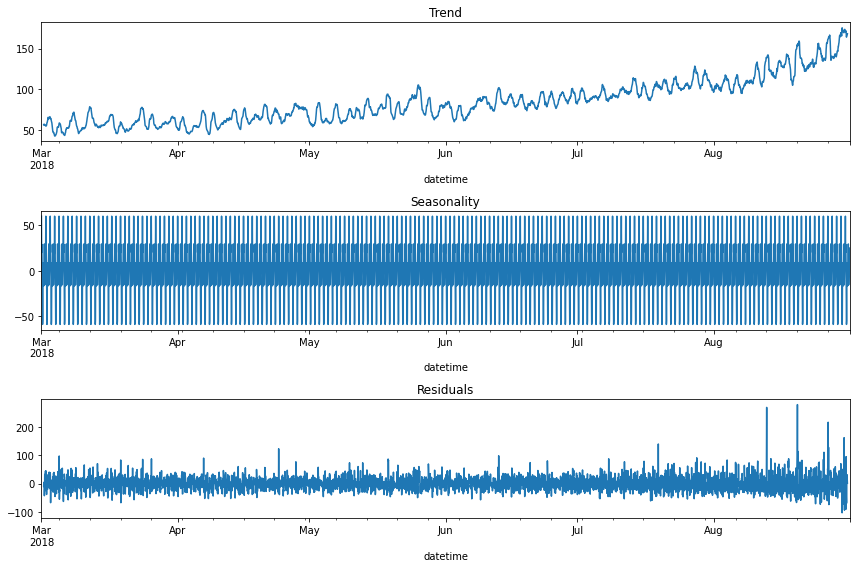

In [20]:
# построем графики тренда, сезонности и остатка декомпозиции
plt.figure(figsize=(12, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

По seasonality возмем более короткий промежуток времени, напрмер, несколько днея для того, чтобы понять, как в течение дня меняется спрос на такси и есть ли какие-то ежедневные зависимости.

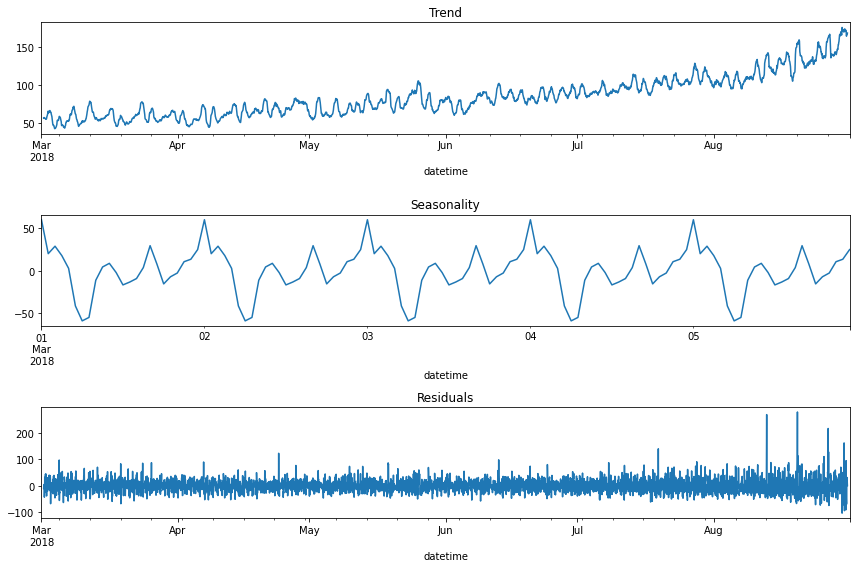

In [21]:
# построем графики тренда, сезонности и остатка декомпозиции, ограничим сезонность с 2018-03-01 по 2018-03-05
plt.figure(figsize=(12, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-05'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Как мы видим, ежедневно график заказов примерно одинаковый, в одно и то же время наблюдаются пики и минимумы, поэтому рассмотрим seasonality в рамках двух дней

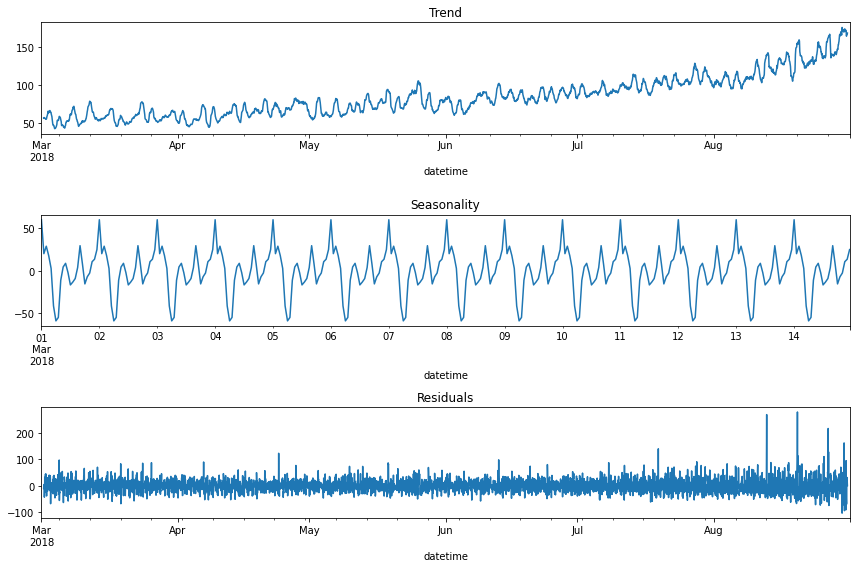

In [22]:
# построем графики тренда, сезонности и остатка декомпозиции, ограничим сезонность за 2018-03-01 
plt.figure(figsize=(12, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-14'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

По графику сезонности видно, что пик загрузки такси приходится в полночь, минимум в 6 утра и есть один локальный макисимум около 17 часов дня. По графику тренда видно, что со временем количество заказов увеличиевается, в августе их больше, чем в марте, возможно, это связано с расширением деятельности фирмы. 

Также на графиках хорошо видно. что среднее меняется с течением времени, а значит, перед нами нестационарный временной ряд, по которому очень сложно прогнозировать. Приведем данный ряд к стационарному.

Найдём скользящее стандартное отклонение 

Сделаем данный график для нескольких дней с 2018-03-01 по 2018-03-10

/tmp/ipykernel_132/1852619970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_some_days['mean'] = df_some_days['num_orders'].rolling(15).mean()
/tmp/ipykernel_132/1852619970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_some_days['std'] = df_some_days['num_orders'].rolling(15).std()


<AxesSubplot:xlabel='datetime'>

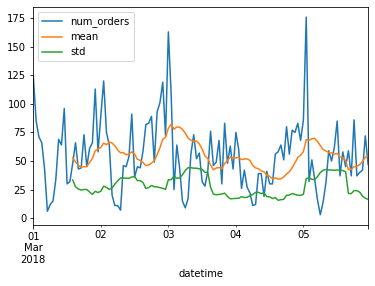

In [23]:
df_some_days = df['2018-03-01':'2018-03-05']
df_some_days['mean'] = df_some_days['num_orders'].rolling(15).mean()
df_some_days['std'] = df_some_days['num_orders'].rolling(15).std()
df_some_days.plot()

<AxesSubplot:xlabel='datetime'>

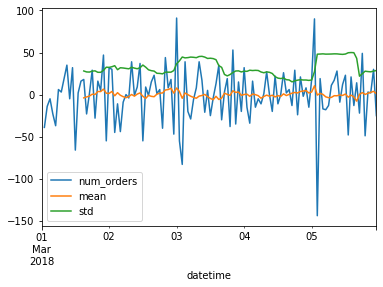

In [24]:
# чтобы ряд сделать стационарным, найдём разности его значений, посмотрим, как это будет выглядеть
df_some_days = df['2018-03-01':'2018-03-05']
df_some_days = df_some_days - df_some_days.shift()
df_some_days['mean'] = df_some_days['num_orders'].rolling(15).mean()
df_some_days['std'] = df_some_days['num_orders'].rolling(15).std()
df_some_days.plot()

Для того, чтобы сделать ряд стационарным напишем функцию make_features(): 

- найдём разности его значений, 

- прибавим к таблице новых календарные признаки: месяц, день, день недели и час

- сформируем отстающие значения с помощью функции shift(): 'lag_1', 'lag_2' — и до величины max_lag

- добавим пррзнак Скользящая средняя

In [25]:
# напишем функцию для создания новых признаков
def make_features(data, max_lag, rolling_mean_size):
    """
    Функция, добавляющая признаки: месяц, день, день недели, час, отстающие значения, скользящее среднее
    """
    
    #data['month'] = data.index.month
    #data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [26]:
# создадим признаки
make_features(df, 10, 10)

In [27]:
# выведем получившися датасет
df.head(10)

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
datetime,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,3,5,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 06:00:00,12,3,6,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 07:00:00,15,3,7,12.0,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 08:00:00,34,3,8,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN


Таким образом, получили таблицу с новыми признаками

### Вывод

В ходе выпоонения данного раздела:

1) по графику сезонности мы увидели, что пик загрузки такси приходится в полночь, минимум в 6 утра и есть один локальный макисимум около 17 часов дня. По графику тренда видно, что со временем количество заказов увеличиевается, в августе их больше, чем в марте, возможно, это связано с расширением деятельности фирмы. Также на графиках хорошо видно, что среднее меняется с течением времени, а значит, перед нами нестационарный временной ряд

2) мы создали функцию для создания дополнительных принаков и приведения имеющегося временного ряда к стационарному

## Обучение

В данном разделе мы:

1) разделим данные на выборки

2) удалим пропуски

3) обучим модели:

    - LinearRegression
    - LGBM модель
    - CatBoost модель
    - модель RandomForest
    - модель DecisionTree
    - константную модель

### Разделение данных

In [28]:
# разделим данные на тренировочную и тестовую выборки
train, test = train_test_split(df, shuffle=False, test_size=0.1)

In [29]:
# разделим выборку train_valid на тренировочную и валидационную
#train, valid = train_test_split(train_valid, shuffle=False, test_size=0.1)

In [30]:
# проверим первый и последний день каждой из выборок
print('train')
print(f'Первый день: {train.index.min()} --- Последний день: {train.index.max()}')
print('=' * 73)
print('test')
print(f'Первый день: {test.index.min()} --- Последний день: {test.index.max()}')
print('=' * 73)

train
Первый день: 2018-03-01 00:00:00 --- Последний день: 2018-08-13 13:00:00
test
Первый день: 2018-08-13 14:00:00 --- Последний день: 2018-08-31 23:00:00


Как видим, данные разделены верно, хронологический порядок сохранен.

In [31]:
# удалим пропуски
train = train.dropna()
test = test.dropna()

In [32]:
# выведем размер выборок
print(train.shape)
print(test.shape)

(3964, 14)
(442, 14)


In [33]:
# проверим наличие пропусков
train.isna().sum()

num_orders      0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
lag_7           0
lag_8           0
lag_9           0
lag_10          0
rolling_mean    0
dtype: int64

In [34]:
# проверим наличие пропусков
test.isna().sum()

num_orders      0
dayofweek       0
hour            0
lag_1           0
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
lag_7           0
lag_8           0
lag_9           0
lag_10          0
rolling_mean    0
dtype: int64

В наших данных пропусков нет, разделим данные на целевой признак и признаки

In [35]:
# по выборке train
features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

In [36]:
# проверим, совпадают ли размеры
features_train.shape, target_train.shape

((3964, 13), (3964,))

In [37]:
# по выборке test
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [38]:
# проверим, совпадают ли размеры
features_test.shape, target_test.shape

((442, 13), (442,))

In [39]:
# выведем полученную таблицу
features_train.head()

,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
datetime,,,,,,,,,,,,,
2018-03-01 10:00:00,3,10,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,52.5
2018-03-01 11:00:00,3,11,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,46.5
2018-03-01 12:00:00,3,12,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,47.6
2018-03-01 13:00:00,3,13,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,43.5
2018-03-01 14:00:00,3,14,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,40.1


### Подбор параметров

In [40]:
# функция для вычисления RMSE
def RMSE(target,predictions):
    """
    Вычисление RMSE модели
    
    return: RMSE модели
    
    """
    
    MSE = mean_squared_error(target, predictions, squared=False)
    
    return MSE

#RMSE_score = make_scorer(RMSE, greater_is_better=False)

In [41]:
# функция подбора лучших параметров моделей
def best_params(model, params, features, target):
    """
    Функция, возвращающая наилучшие параметры модели
    
    """   
    tscv = TimeSeriesSplit(n_splits=7)
    grid = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=tscv, verbose=1)
    grid.fit(features_train,target_train)
    
    return grid.best_params_

**LGBM модель**

In [42]:
lgbm_params = {
    'n_estimators': [10, 20, 100],
    'max_depth': [5, 30],
    'num_leaves': [10, 20, 31],
    'learning_rate':[0.2]
}
lgbm_model = LGBMRegressor(random_state=12345)

In [43]:
lgbm_best_params = best_params(lgbm_model, lgbm_params, features_train, target_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [44]:
print(lgbm_best_params)

{'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 20, 'num_leaves': 20}


**CatBoost модель**

In [45]:
catboost_params = {
    'learning_rate': [0.2],
    'iterations': [10, 30, 200],
    'max_depth': [1, 12]
}

catboost_model = CatBoostRegressor(random_state=12345, silent=True)

In [46]:
catboost_best_params = best_params(catboost_model, catboost_params, features_train, target_train)

Fitting 7 folds for each of 6 candidates, totalling 42 fits


In [47]:
print(catboost_best_params)

{'iterations': 200, 'learning_rate': 0.2, 'max_depth': 12}


**Модель RandomForest**

In [48]:
random_forest_model = RandomForestRegressor(random_state=12345)
random_forest_params = {'n_estimators':range(10, 51, 3), 
                        'max_depth': range (1, 20)}

In [49]:
random_forest_best_params = best_params(random_forest_model, random_forest_params, features_train, target_train)

Fitting 7 folds for each of 266 candidates, totalling 1862 fits


In [50]:
print(random_forest_best_params)

{'max_depth': 19, 'n_estimators': 49}


**Модель DecisionTree**

In [51]:
decision_tree_model = DecisionTreeRegressor(random_state=12345)
tree_params = {'min_samples_leaf': range(1, 20), 
               'max_depth':range (1, 20)}

In [52]:
tree_best_params = best_params(decision_tree_model, tree_params, features_train, target_train)

Fitting 7 folds for each of 361 candidates, totalling 2527 fits


In [53]:
print(tree_best_params)

{'max_depth': 13, 'min_samples_leaf': 16}


### Обучение моделей

In [54]:
# напишем функцию для замера времени обучения, предсказания и RMSE
def best_model(model, features_train, target_train, features_test, target_test):
    """
    Функция определения времени обучения, времени предсказания и RMSE модели
    
    return: время обучения, время предсказания, RMSE модели
    """

    start_time = time.time()
    model.fit(features_train,target_train)
    first_time = time.time() - start_time
    start_time = time.time()
    predict = model.predict(features_test)
    second_time = time.time() - start_time
    
    return first_time, second_time, RMSE(target_test, predict)


**Константная модель**

In [55]:
# напишем функцию для замера времени обучения, предсказания и RMSE
def best_model(model, features_train, target_train, features_test, target_test):
    """
    Функция определения времени обучения, времени предсказания и RMSE модели
    
    return: время обучения, время предсказания, RMSE модели
    """

    start_time = time.time()
    model.fit(features_train,target_train)
    first_time = time.time() - start_time
    start_time = time.time()
    predict = model.predict(features_test)
    second_time = time.time() - start_time
    
    return first_time, second_time, RMSE(target_test, predict)

84.69711915225858

**Обучение LGBM модели**

In [56]:
model_lgbm = LGBMRegressor(**lgbm_best_params, random_state=12345)
lgbm_test = best_model(model_lgbm, features_train, target_train, features_test, target_test)

**Обучение CatBoost модели**

In [57]:
model_catboost = CatBoostRegressor(**catboost_best_params, random_state=12345, silent=True)
catboost_test = best_model(model_catboost, features_train, target_train, features_test, target_test)

**Обучение модели RandomForest**

In [58]:
model_random_forest = RandomForestRegressor(**random_forest_best_params, random_state=12345)
random_forest_test = best_model(model_random_forest, features_train, target_train, features_test, target_test)

**Обучение модели DecisionTree**

In [59]:
model_decision_tree = DecisionTreeRegressor(**tree_best_params, random_state=12345)
decision_tree_test = best_model(model_decision_tree, features_train, target_train, features_test, target_test)

**Обучение LinearRegression**

In [60]:
model_linear = LinearRegression()
linear_test = best_model(model_linear, features_train, target_train, features_test, target_test)

### Вывод

В ходе выполнения данног раздела, мы:

1) разделили данные на выборки train и test

2) подобрали для каждой модели наилучшие параметры

3) обучили модели

## Тестирование

In [61]:
# создадим таблицу models_test
models_test = pd.DataFrame([lgbm_test, decision_tree_test, random_forest_test, linear_test, catboost_test],
                     columns=['Время обучения', 'Время предсказания', 'RMSE'],
                      index=['LGBM модель', 'DecisionTree модель', 'RandomForest модель', 'Линейная регрессия', 'CatBoost модель']
                     )

In [62]:
# выведем результаты
models_test

,Время обучения,Время предсказания,RMSE
LGBM модель,1.463987,0.009198,45.945070
DecisionTree модель,0.024521,0.001654,49.568354
RandomForest модель,1.230354,0.009020,46.189395
Линейная регрессия,0.011245,0.002149,54.035481
CatBoost модель,22.571031,0.004090,50.391764


В ходе тестирования моделей, мы получили:

1) значения RMSE всех моделей меньше данного значения на константной модели, что говорит о том, что модели предсказывают адекватные данные

2) лучшие показатели RMSE у моделей: LGBM - 45.9, при времени обучения - 0.04 и предсказания - 0.004 и RandomForest - 47 при времени обучения - 1.05 и предсказания - 0.011

3) худший показатель RMSE у модели Линейная регрессия, при этом время обучения и предсказания одни из наилучших (0.004 и 0.001 соответственно

Проанализируем на графике, как две лучшие модели предсказывают значения:

1) выведем данные за период 2018-08-20:2018-08-22

2) данные за период 2018-08-14

3) данные за период 2018-08-22

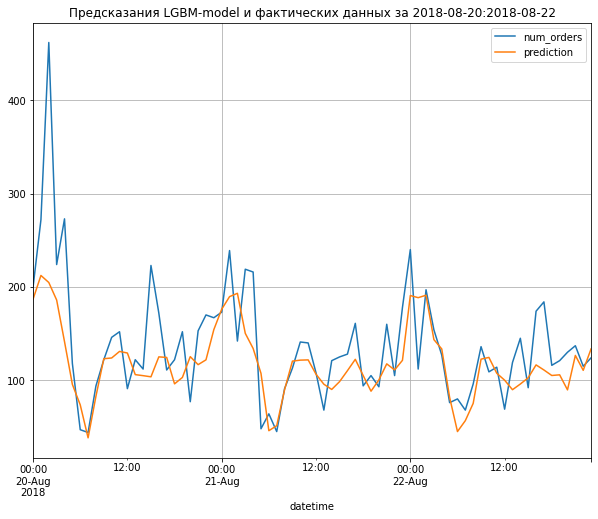

In [63]:
# для модели LGBM 
model = model_lgbm.fit(features_train,target_train)
pred_test_lgbm = model.predict(features_test)
data_plot = test.copy()
data_plot['prediction'] = pred_test_lgbm
predict_plot = data_plot[['num_orders', 'prediction']]['2018-08-20':'2018-08-22'].plot(kind='line', figsize=(10, 8), grid = True)
plt.title('Предсказания LGBM-model и фактических данных за 2018-08-20:2018-08-22')
plt.show()

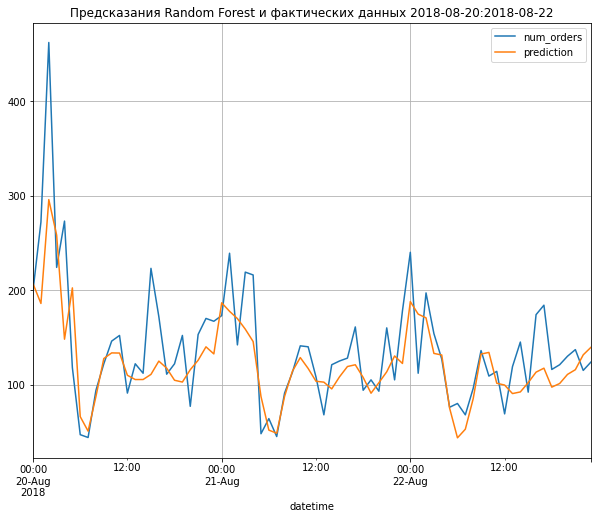

In [64]:
# для модели RsndomForest
model_forest = model_random_forest.fit(features_train,target_train)
pred_test_lgbm = model_forest.predict(features_test)
data_plot = test.copy()
data_plot['prediction'] = pred_test_lgbm
predict_plot = data_plot[['num_orders', 'prediction']]['2018-08-20':'2018-08-22'].plot(kind='line', figsize=(10, 8), grid = True)
plt.title('Предсказания Random Forest и фактических данных 2018-08-20:2018-08-22')
plt.show()

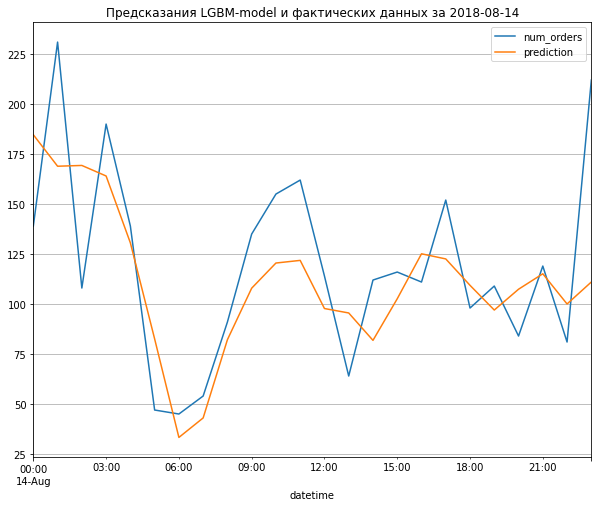

In [65]:
# для модели LGBM
model = model_lgbm.fit(features_train,target_train)
pred_test_lgbm = model.predict(features_test)
data_plot = test.copy()
data_plot['prediction'] = pred_test_lgbm
predict_plot = data_plot[['num_orders', 'prediction']]['2018-08-14':'2018-08-14'].plot(kind='line', figsize=(10, 8), grid = True)
plt.title('Предсказания LGBM-model и фактических данных за 2018-08-14')
plt.show()

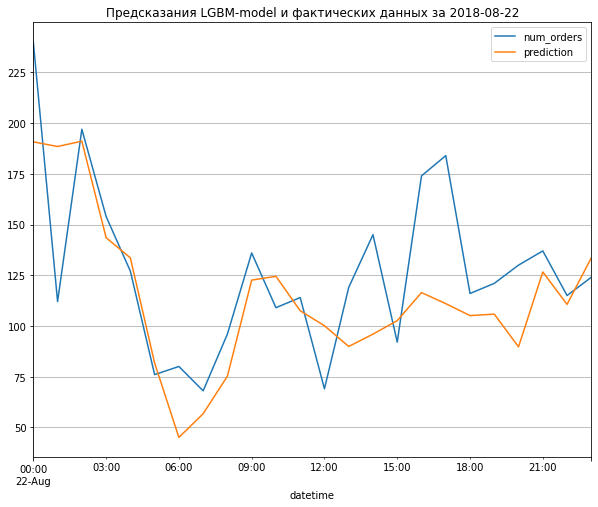

In [66]:
# для модели LGBM
model = model_lgbm.fit(features_train,target_train)
pred_test_lgbm = model.predict(features_test)
data_plot = test.copy()
data_plot['prediction'] = pred_test_lgbm
predict_plot = data_plot[['num_orders', 'prediction']]['2018-08-22':'2018-08-22'].plot(kind='line', figsize=(10, 8), grid = True)
plt.title('Предсказания LGBM-model и фактических данных за 2018-08-22')
plt.show()

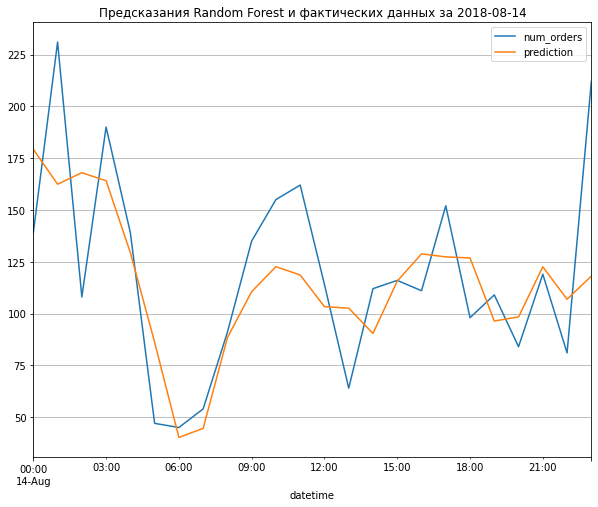

In [67]:
# для модели RandomForest
model_forest = model_random_forest.fit(features_train,target_train)
pred_test_lgbm = model_forest.predict(features_test)
data_plot = test.copy()
data_plot['prediction'] = pred_test_lgbm
predict_plot = data_plot[['num_orders', 'prediction']]['2018-08-14':'2018-08-14'].plot(kind='line', figsize=(10, 8), grid = True)
plt.title('Предсказания Random Forest и фактических данных за 2018-08-14')
plt.show()

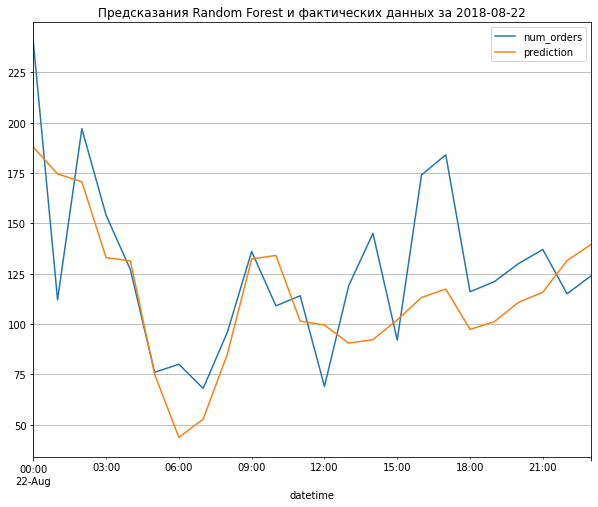

In [68]:
# для модели RandomForest
model_forest = model_random_forest.fit(features_train,target_train)
pred_test_lgbm = model_forest.predict(features_test)
data_plot = test.copy()
data_plot['prediction'] = pred_test_lgbm
predict_plot = data_plot[['num_orders', 'prediction']]['2018-08-22':'2018-08-22'].plot(kind='line', figsize=(10, 8), grid = True)
plt.title('Предсказания Random Forest и фактических данных за 2018-08-22')
plt.show()

Сравнительная графики показывают, что обе модели: LGBM и RandomForest хорошо предсказывают пиковые активности, причём минимумы предсказывает намного лучше, чем максимумы. По их предсказаниям,минимальное число заказов приходится на 6 утра также, какми в фактических данных. НО вот высокое количество заказов в вечернее время около 16-17 часов обе модели предсказывают хуже. Как мне кажется, верхние пики предсказаний LGBМ ближе к фактическим данным, чем верхние пики предсказаний RandomForest. При этом, нижние пики предсказаний RandomForest ближе к фактическим данным, чем нижние пики предсказаний LGBM. Но эти данные могут разнится в зависимости от выбранного дня, на графиках это тоже видно.

### Вывод

В ходе тестирования моделей получили:

1) значения RMSE всех моделей меньше данного значения на константной модели, что говорит о том, что модели предсказывают адекватные данные

2) лучшие показатели RMSE у моделей: LGBM - 45.9, при времени обучения - 0.04 и предсказания - 0.004 и RandomForest - 47 при времени обучения - 1.05 и предсказания - 0.011

3) худший показатель RMSE у модели Линейная регрессия, при этом время обучения и предсказания одни из наилучших (0.004 и 0.001 соответственно

Если изучать графики, то они показывают, что обе модели: LGBM и RandomForest хорошо предсказывают пиковые активности, причём минимумы предсказывает намного лучше, чем максимумы. По их предсказаниям,минимальное число заказов приходится на 6 утра также, какми в фактических данных. НО вот высокое количество заказов в вечернее время около 16-17 часов обе модели предсказывают хуже. Как мне кажется, верхние пики предсказаний LGBМ ближе к фактическим данным, чем верхние пики предсказаний RandomForest. При этом, нижние пики предсказаний RandomForest ближе к фактическим данным, чем нижние пики предсказаний LGBM. Но эти данные могут разнится в зависимости от выбранного дня.

## Общий вывод

В ходе проведенной работы мы:

1) в разделе подготовки данных мы:

    - открыли и изучили датасет, пропусков не было обнаружено, названия столбцов указаны верно
    - заново открыли датасет, указав специфические параметры для того, чтобы в столбце datetime был необходимы формат, сделали данный столбец в качестве индексов, проверили, в хронологическом ли порядке идут наши даты. Нашли минимальную и максимальную даты: 2018-03-01 и 2018-08-31 соответственно
    - провели ресемплирование данных по одному часу.

2) в разделе анализа данных мы: 

    - по графику сезонности увидели, что пик загрузки такси приходится в полночь, минимум в 6 утра и есть один локальный макисимум около 16-17 часов дня
    - по графику тренда видно, что со временем количество заказов увеличиевается, в августе их больше, чем в марте, возможно, это связано с расширением деятельности фирмы
    - также на графиках хорошо видно, что среднее меняется с течением времени, а значит, перед нами нестационарный временной ряд
    - для приведения имеющегося временного ряда к стационарномусоздали функцию для создания дополнительных принаков
    
3) в разделе обучение мы: 

    - разделили данные на выборки train и test
    - подобрали для каждой модели наилучшие параметры
    - обучили модели
    
4) в разделе тестирование мы получили следующие данные:

    - значения RMSE всех моделей меньше данного значения на константной модели, что говорит о том, что модели предсказывают адекватные данные
    - лучшие показатели RMSE у моделей: LGBM - 45.9, при времени обучения - 0.04 и предсказания - 0.004 и RandomForest - 47 при времени обучения - 1.05 и предсказания - 0.011
    - худший показатель RMSE у модели Линейная регрессия, при этом время обучения и предсказания одни из наилучших (0.004 и 0.001 соответственно
    
Если изучать графики, то они показывают, что обе модели: LGBM и RandomForest хорошо предсказывают пиковые активности, причём минимумы предсказывает намного лучше, чем максимумы. По их предсказаниям,минимальное число заказов приходится на 6 утра также, какми в фактических данных. НО вот высокое количество заказов в вечернее время около 16-17 часов обе модели предсказывают хуже. Как мне кажется, верхние пики предсказаний LGBМ ближе к фактическим данным, чем верхние пики предсказаний RandomForest. При этом, нижние пики предсказаний RandomForest ближе к фактическим данным, чем нижние пики предсказаний LGBM. Но эти данные могут разнится в зависимости от выбранного дня.

Таком образом, для предсказания мы порекомендуем модели LGBM с параметрами {'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 20, 'num_leaves': 20} и RandomForest с параметрами {'max_depth': 4, 'n_estimators': 14}